## Support Vector Classifier Implementation

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [64]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=1,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

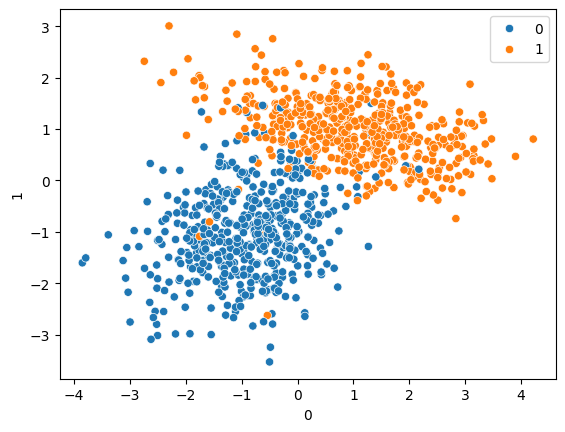

In [65]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [67]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [68]:
y_pred = svc.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report\n",classification_report(y_test,y_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       132
           1       0.91      0.98      0.95       118

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

Confusion Matrix
 [[121  11]
 [  2 116]]


## By changing number f Clusters

In [70]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

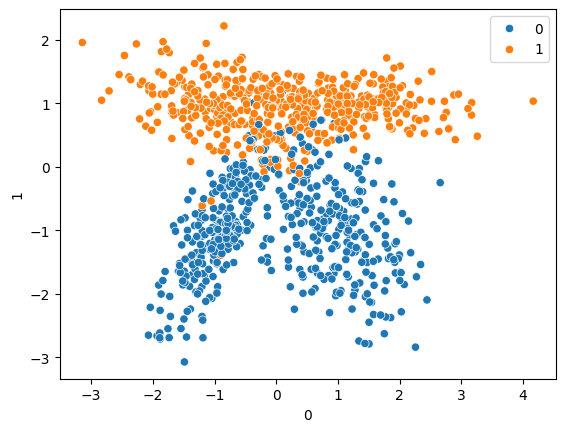

In [71]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [73]:
from sklearn.svm import SVC
svc_lin = SVC(kernel='linear')
svc_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [74]:
y_pred = svc_lin.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report\n",classification_report(y_test,y_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.94      0.95      0.95       122

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

Confusion Matrix
 [[121   7]
 [  6 116]]


In [76]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train,y_train)

SVC()

In [77]:
y_pred = svc_rbf.predict(X_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report\n",classification_report(y_test,y_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       128
           1       0.94      0.96      0.95       122

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

Confusion Matrix
 [[121   7]
 [  5 117]]


In [79]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
## Prediction
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       128
           1       0.96      0.90      0.93       122

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[124   4]
 [ 12 110]]


In [80]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       128
           1       0.86      0.91      0.88       122

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.89      0.88      0.88       250

[[110  18]
 [ 11 111]]


### Hyper Parameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [82]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [83]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       128
           1       0.93      0.95      0.94       122

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[119   9]
 [  6 116]]
